In [9]:
import psycopg2

# Database credentials
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'Duke#7539',
    'database': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to the PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Create a cursor to interact with the database
    cursor = conn.cursor()

    # Display a message upon successful connection
    print("Connected to PostgreSQL!")

    # Close cursor and connection
    cursor.close()
    conn.close()
except psycopg2.Error as e:
    print(f"Error connecting to PostgreSQL: {e}")



Connected to PostgreSQL!


In [4]:
import pandas as pd
from fuzzywuzzy import fuzz

# Load the CSV dataset into a pandas DataFrame
file_path = 'world_development_data.csv'
data = pd.read_csv(file_path)

# Extract column names from the CSV dataset
csv_columns = data.columns.tolist()

# Define the columns from Table 1 (CountryInfo)
table1_columns = [
    'CountryID', 'CountryName', 'Region', 'SubRegion',
    'IntermRegion', 'SurfAreaSqKm', 'PopDensWW', 'PopGrowth'
]

# Compare CSV columns with Table 1 columns using FuzzyWuzzy
similarity_threshold = 80  # Set your desired threshold for similarity
similar_columns = {}

for csv_col in csv_columns:
    for table1_col in table1_columns:
        similarity_score = fuzz.token_sort_ratio(csv_col, table1_col)
        if similarity_score >= similarity_threshold:
            if csv_col not in similar_columns:
                similar_columns[csv_col] = [(table1_col, similarity_score)]
            else:
                similar_columns[csv_col].append((table1_col, similarity_score))

# Display similar columns and their matches
for csv_col, matches in similar_columns.items():
    print(f"CSV Column '{csv_col}' matches with Table 1 columns:")
    for match in matches:
        print(f"- {match[0]} (Similarity: {match[1]})")
    print()


CSV Column 'Country' matches with Table 1 columns:
- CountryID (Similarity: 88)

CSV Column 'Region' matches with Table 1 columns:
- Region (Similarity: 100)
- SubRegion (Similarity: 80)

CSV Column 'SubRegion' matches with Table 1 columns:
- Region (Similarity: 80)
- SubRegion (Similarity: 100)

CSV Column 'IntermRegion' matches with Table 1 columns:
- IntermRegion (Similarity: 100)

CSV Column 'SurfAreaSqKm' matches with Table 1 columns:
- SurfAreaSqKm (Similarity: 100)

CSV Column 'PopDens' matches with Table 1 columns:
- PopDensWW (Similarity: 88)

CSV Column 'PopGrowth%' matches with Table 1 columns:
- PopGrowth (Similarity: 100)



TABLE 1

In [10]:
import pandas as pd
import psycopg2

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'Duke#7539',
    'dbname': 'lab10',
    'port': 5432
}

# File path for the CSV dataset
file_path = 'world_development_data.csv'

# Load the CSV dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Establish a connection to your PostgreSQL database
conn = psycopg2.connect(**db_config)

# Open a cursor to perform database operations
cur = conn.cursor()

# Insert data into the PostgreSQL table with incremental CountryID values
for idx, row in data.iterrows():
    # Assign incremental numbers to CountryID starting from 1
    country_id = idx + 1

    # Extract data from the CSV
    country_name = row['Country']
    region = row['Region']
    sub_region = row['SubRegion']
    interm_region = row['IntermRegion']
    surf_area_sq_km = row['SurfAreaSqKm']
    pop_dens = row['PopDens']
    pop_growth = row['PopGrowth%']

    # SQL query to insert data into the CountryInfo table
    sql = """
    INSERT INTO CountryInfo (CountryID, CountryName, Region, SubRegion, IntermRegion, SurfAreaSqKm, PopDensWW, PopGrowth)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s);
    """

    # Execute the SQL query
    cur.execute(sql, (country_id, country_name, region, sub_region, interm_region, surf_area_sq_km, pop_dens, pop_growth))

# Commit changes to the database
conn.commit()

# Close communication with the database
cur.close()
conn.close()


TABLE 2 

In [11]:
import pandas as pd
from fuzzywuzzy import fuzz

# Column names from EconomicIndicators table
table2_columns = [
    'Year', 'CountryID', 'GDP', 'GDPGrowth', 'AdolFertRate', 'AgriValAddGDP',
    'DomCreditGDP', 'ExportsGDP', 'FertRate', 'FDINetBoP', 'GNICapAtlas',
    'GNIAtlas', 'GrossCapFormGDP', 'ImportsGDP', 'IndValAddGDP'
]

# Load the CSV dataset into a pandas DataFrame
file_path = 'world_development_data.csv'
data = pd.read_csv(file_path)

# Extract column names from the CSV dataset
csv_columns = data.columns.tolist()

# Find similar columns between CSV and table2_columns
similar_columns_table2 = {}

for csv_col in csv_columns:
    for table2_col in table2_columns:
        similarity_score = fuzz.token_sort_ratio(csv_col, table2_col)
        if similarity_score >= 80:  # Set your desired threshold for similarity
            if csv_col not in similar_columns_table2:
                similar_columns_table2[csv_col] = [(table2_col, similarity_score)]
            else:
                similar_columns_table2[csv_col].append((table2_col, similarity_score))

# Display similar columns and their matches
for csv_col, matches in similar_columns_table2.items():
    print(f"CSV Column '{csv_col}' matches with Table 2 columns:")
    for match in matches:
        print(f"- {match[0]} (Similarity: {match[1]})")
    print()


CSV Column 'Year' matches with Table 2 columns:
- Year (Similarity: 100)

CSV Column 'Country' matches with Table 2 columns:
- CountryID (Similarity: 88)

CSV Column 'GDP' matches with Table 2 columns:
- GDP (Similarity: 100)

CSV Column 'GDPGrowth%' matches with Table 2 columns:
- GDPGrowth (Similarity: 100)

CSV Column 'AdolFertRate' matches with Table 2 columns:
- AdolFertRate (Similarity: 100)
- FertRate (Similarity: 80)

CSV Column 'AgriValAdd%GDP' matches with Table 2 columns:
- AgriValAddGDP (Similarity: 96)

CSV Column 'DomCredit%GDP' matches with Table 2 columns:
- DomCreditGDP (Similarity: 96)

CSV Column 'Exports%GDP' matches with Table 2 columns:
- ExportsGDP (Similarity: 95)

CSV Column 'FertRate' matches with Table 2 columns:
- AdolFertRate (Similarity: 80)
- FertRate (Similarity: 100)

CSV Column 'FDINetBoP' matches with Table 2 columns:
- FDINetBoP (Similarity: 100)

CSV Column 'GNIAtlas' matches with Table 2 columns:
- GNICapAtlas (Similarity: 84)
- GNIAtlas (Similarit

In [12]:
import pandas as pd
import psycopg2

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'Duke#7539',
    'dbname': 'lab10',
    'port': 5432
}

# File path for the CSV dataset
file_path = 'world_development_data.csv'

# Load the CSV dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Establish a connection to your PostgreSQL database
conn = psycopg2.connect(**db_config)

# Open a cursor to perform database operations
cur = conn.cursor()

# Insert data into the PostgreSQL table with values corresponding to the EconomicIndicators columns
success = True  # Flag to track successful insertion

for idx, row in data.iterrows():
    try:
        # Extract data from the CSV
        year = row['Year']
        country_name = row['Country']  # Assuming 'Country' column name from CSV
        gdp = row['GDP']
        gdp_growth = row['GDPGrowth%']
        adol_fert_rate = row['AdolFertRate']
        agri_val_add_gdp = row['AgriValAdd%GDP']
        dom_credit_gdp = row['DomCredit%GDP']
        exports_gdp = row['Exports%GDP']
        # Add other columns similarly...

        # Fetch the CountryID from CountryInfo table based on CountryName
        cur.execute("SELECT CountryID FROM CountryInfo WHERE CountryName = %s;", (country_name,))
        country_id = cur.fetchone()[0]

        # SQL query to insert data into the EconomicIndicators table
        sql = """
        INSERT INTO EconomicIndicators (Year, CountryID, GDP, GDPGrowth, AdolFertRate, AgriValAddGDP, DomCreditGDP, ExportsGDP)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s);
        """

        # Execute the SQL query
        cur.execute(sql, (year, country_id, gdp, gdp_growth, adol_fert_rate, agri_val_add_gdp, dom_credit_gdp, exports_gdp))
        # Add other columns similarly...

    except (psycopg2.Error, KeyError, TypeError) as e:
        print(f"Error occurred: {e}")
        success = False
        break

# Commit changes to the database if no errors occurred
if success:
    conn.commit()
    print("Data inserted successfully!")
else:
    print("Data insertion failed.")

# Close communication with the database
cur.close()
conn.close()


Data inserted successfully!


TABLE 3 

In [13]:
import pandas as pd
from fuzzywuzzy import fuzz

# Column names from DemographicIndicators table
table3_columns = [
    'Year', 'CountryID', 'LifeExpBirth', 'MortRateU5', 'NetMigr', 'PopTotal'
    # Add other columns from the DemographicIndicators table
]

# Load the CSV dataset into a pandas DataFrame
file_path = 'world_development_data.csv'
data = pd.read_csv(file_path)

# Extract column names from the CSV dataset
csv_columns = data.columns.tolist()

# Find similar columns between CSV and table3_columns
similar_columns_table3 = {}

for csv_col in csv_columns:
    for table3_col in table3_columns:
        similarity_score = fuzz.token_sort_ratio(csv_col, table3_col)
        if similarity_score >= 80:  # Set your desired threshold for similarity
            if csv_col not in similar_columns_table3:
                similar_columns_table3[csv_col] = [(table3_col, similarity_score)]
            else:
                similar_columns_table3[csv_col].append((table3_col, similarity_score))

# Display similar columns and their matches
for csv_col, matches in similar_columns_table3.items():
    print(f"CSV Column '{csv_col}' matches with Table 3 columns:")
    for match in matches:
        print(f"- {match[0]} (Similarity: {match[1]})")
    print()


CSV Column 'Year' matches with Table 3 columns:
- Year (Similarity: 100)

CSV Column 'Country' matches with Table 3 columns:
- CountryID (Similarity: 88)

CSV Column 'LifeExpBirth' matches with Table 3 columns:
- LifeExpBirth (Similarity: 100)

CSV Column 'MortRateU5' matches with Table 3 columns:
- MortRateU5 (Similarity: 100)

CSV Column 'NetMigr' matches with Table 3 columns:
- NetMigr (Similarity: 100)

CSV Column 'PopTotal' matches with Table 3 columns:
- PopTotal (Similarity: 100)



In [31]:
import pandas as pd
import psycopg2

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'Duke#7539',
    'dbname': 'lab10',
    'port': 5432
}

# File path for the CSV dataset
file_path = 'world_development_data.csv'

# Load the CSV dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Establish a connection to your PostgreSQL database
conn = psycopg2.connect(**db_config)

# Open a cursor to perform database operations
cur = conn.cursor()

# Insert data into the PostgreSQL table with values corresponding to the DemographicIndicators columns
success = True  # Flag to track successful insertion
current_country_id = 0  # Starting CountryID

for idx, row in data.iterrows():
    try:
        # Extract data from the CSV
        year = row['Year']
        life_exp_birth = row['LifeExpBirth']
        mort_rate_u5 = row['MortRateU5']
        net_migr = row['NetMigr']
        pop_total = row['PopTotal']

        # Incremental CountryID assignment
        current_country_id += 1

        # SQL query to insert data into the DemographicIndicators table
        sql = """
        INSERT INTO DemographicIndicators (Year, CountryID, LifeExpBirth, MortRateU5, NetMigr, PopTotal)
        VALUES (%s, %s, %s, %s, %s, %s);
        """

        # Execute the SQL query
        cur.execute(sql, (year, current_country_id, life_exp_birth, mort_rate_u5, net_migr, pop_total))

    except (psycopg2.Error, KeyError, TypeError) as e:
        print(f"Error occurred: {e}")
        success = False
        break

# Commit changes to the database if no errors occurred
if success:
    conn.commit()
    print("Data inserted successfully!")
else:
    print("Data insertion failed.")

# Close communication with the database
cur.close()
conn.close()


Data inserted successfully!


TABLE 4

In [34]:
import pandas as pd
from fuzzywuzzy import fuzz

# Column names from TradeIndicators table
table4_columns = [
    'Year', 'CountryID', 'MerchTradeGDP'
    # Add other columns from the TradeIndicators table
]

# Load the CSV dataset into a pandas DataFrame
file_path = 'world_development_data.csv'
data = pd.read_csv(file_path)

# Extract column names from the CSV dataset
csv_columns = data.columns.tolist()

# Find similar columns between CSV and table4_columns
similar_columns_table4 = {}

for csv_col in csv_columns:
    for table4_col in table4_columns:
        similarity_score = fuzz.token_sort_ratio(csv_col, table4_col)
        if similarity_score >= 80:  # Set your desired threshold for similarity
            if csv_col not in similar_columns_table4:
                similar_columns_table4[csv_col] = [(table4_col, similarity_score)]
            else:
                similar_columns_table4[csv_col].append((table4_col, similarity_score))

# Display similar columns and their matches
for csv_col, matches in similar_columns_table4.items():
    print(f"CSV Column '{csv_col}' matches with Table 4 columns:")
    for match in matches:
        print(f"- {match[0]} (Similarity: {match[1]})")
    print()


CSV Column 'Year' matches with Table 4 columns:
- Year (Similarity: 100)

CSV Column 'Country' matches with Table 4 columns:
- CountryID (Similarity: 88)



In [36]:
import pandas as pd
import psycopg2

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'Duke#7539',
    'dbname': 'lab10',
    'port': 5432
}

# File path for the CSV dataset
file_path = 'world_development_data.csv'

# Load the CSV dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Establish a connection to your PostgreSQL database
conn = psycopg2.connect(**db_config)

# Open a cursor to perform database operations
cur = conn.cursor()

# Insert data into the PostgreSQL table with values corresponding to the TradeIndicators columns
success = True  # Flag to track successful insertion
current_country_id = 0  # Starting CountryID

for idx, row in data.iterrows():
    try:
        # Extract data from the CSV
        year = row['Year']
        merch_trade_gdp = row['MerchTrade%GDP']  # Assuming column name; adjust if different
        # Add other column extractions based on the CSV and table structure

        # Incremental CountryID assignment
        current_country_id += 1

        # SQL query to insert data into the TradeIndicators table
        sql = """
        INSERT INTO TradeIndicators (Year, CountryID, MerchTradeGDP)
        VALUES (%s, %s, %s);
        """

        # Execute the SQL query
        cur.execute(sql, (year, current_country_id, merch_trade_gdp))

    except (psycopg2.Error, KeyError, TypeError) as e:
        print(f"Error occurred: {e}")
        success = False
        break

# Commit changes to the database if no errors occurred
if success:
    conn.commit()
    print("Data inserted successfully!")
else:
    print("Data insertion failed.")

# Close communication with the database
cur.close()
conn.close()


Data inserted successfully!


TABLE 5

In [38]:
from fuzzywuzzy import process
import pandas as pd

# Define the columns from the MiscellaneousIndicators table
table5_columns = [
    'Year', 'CountryID', 'UrbanPopGrowth'
    # Add other columns from the MiscellaneousIndicators table
]

# Load the CSV dataset into a pandas DataFrame
file_path = 'world_development_data.csv'
data = pd.read_csv(file_path)

# Extract column names from the CSV dataset
csv_columns = data.columns.tolist()

# Find the best match for each column using fuzzy matching
for col in table5_columns:
    match = process.extractOne(col, csv_columns)
    print(f"Table 5 column '{col}' matches with CSV column '{match[0]}' (Similarity: {match[1]})")


Table 5 column 'Year' matches with CSV column 'Year' (Similarity: 100)
Table 5 column 'CountryID' matches with CSV column 'Country' (Similarity: 88)
Table 5 column 'UrbanPopGrowth' matches with CSV column 'UrbanPopGrowth%' (Similarity: 100)


In [39]:
import pandas as pd
import psycopg2

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'Duke#7539',
    'dbname': 'lab10',
    'port': 5432
}

# File path for the CSV dataset
file_path = 'world_development_data.csv'

# Load the CSV dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Establish a connection to your PostgreSQL database
conn = psycopg2.connect(**db_config)

# Open a cursor to perform database operations
cur = conn.cursor()

# Insert data into the PostgreSQL table with values corresponding to the MiscellaneousIndicators columns
success = True  # Flag to track successful insertion
current_country_id = 0  # Starting CountryID

for idx, row in data.iterrows():
    try:
        # Extract data from the CSV
        year = row['Year']
        urban_pop_growth = row['UrbanPopGrowth%']  # Assuming column name; adjust if different
        # Add other column extractions based on the CSV and table structure

        # Incremental CountryID assignment
        current_country_id += 1

        # SQL query to insert data into the MiscellaneousIndicators table
        sql = """
        INSERT INTO MiscellaneousIndicators (Year, CountryID, UrbanPopGrowth)
        VALUES (%s, %s, %s);
        """

        # Execute the SQL query
        cur.execute(sql, (year, current_country_id, urban_pop_growth))

    except (psycopg2.Error, KeyError, TypeError) as e:
        print(f"Error occurred: {e}")
        success = False
        break

# Commit changes to the database if no errors occurred
if success:
    conn.commit()
    print("Data inserted successfully!")
else:
    print("Data insertion failed.")

# Close communication with the database
cur.close()
conn.close()


Data inserted successfully!


VISUALIZATION

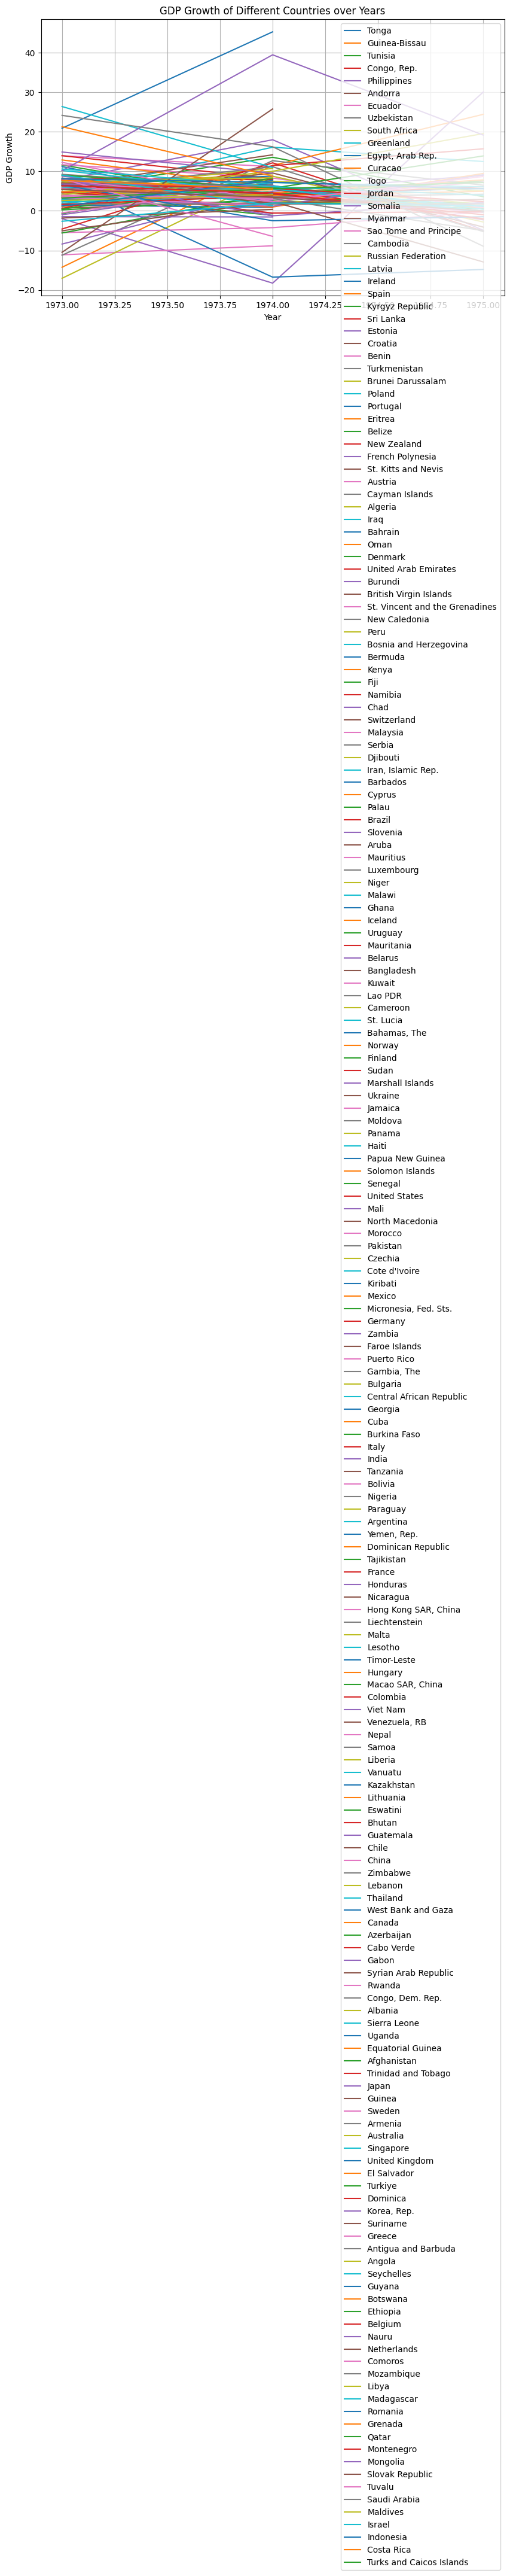

In [15]:
import psycopg2
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'Duke#7539',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Open a cursor to perform database operations
    cur = conn.cursor()

    # Query to retrieve CountryID, CountryName, Year, and GDPGrowth from EconomicIndicators and CountryInfo tables
    query = """
        SELECT CI.CountryName, EI.Year, EI.GDPGrowth
        FROM CountryInfo CI
        INNER JOIN EconomicIndicators EI ON CI.CountryID = EI.CountryID;
    """
    cur.execute(query)
    combined_data = cur.fetchall()

    # Close communication with the database
    cur.close()
    conn.close()

    # Plotting
    plt.figure(figsize=(10, 6))
    for country_name in set([row[0] for row in combined_data]):  # Plot for each unique country
        country_gdp_growth = [row[2] for row in combined_data if row[0] == country_name]
        country_years = [row[1] for row in combined_data if row[0] == country_name]
        plt.plot(country_years, country_gdp_growth, label=country_name)

    plt.xlabel('Year')
    plt.ylabel('GDP Growth')
    plt.title('GDP Growth of Different Countries over Years')
    plt.legend()
    plt.grid(True)
    plt.show()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualization 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


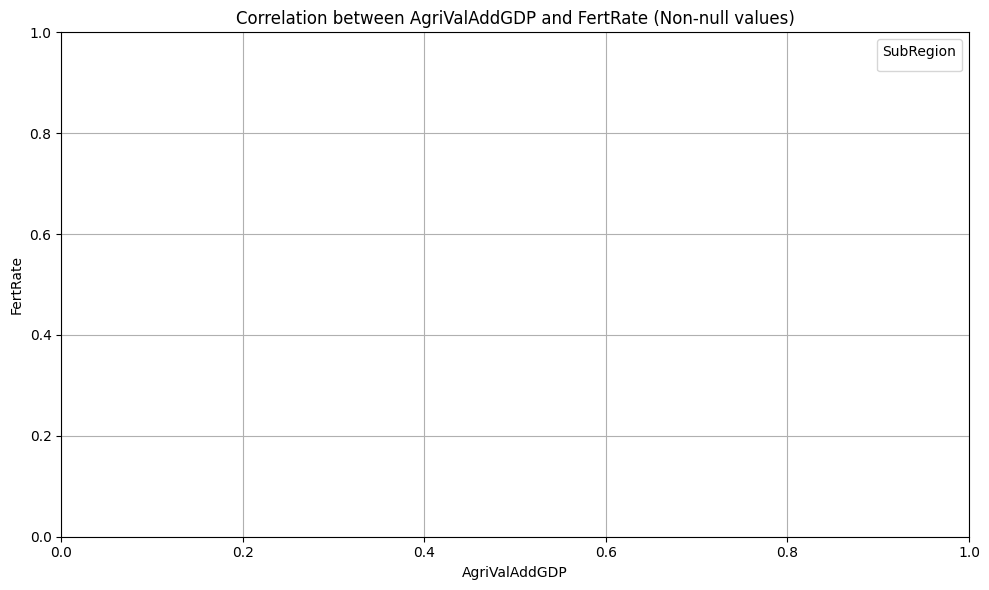

In [25]:
import psycopg2
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'Duke#7539',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Open a cursor to perform database operations
    cur = conn.cursor()

    # Query to retrieve SubRegion, AgriValAddGDP, and FertRate columns with non-null values
    query = """
    SELECT ci.SubRegion, ei.AgriValAddGDP, ei.FertRate
    FROM CountryInfo ci
    JOIN EconomicIndicators ei ON ci.CountryID = ei.CountryID
    WHERE ei.AgriValAddGDP IS NOT NULL AND ei.FertRate IS NOT NULL;
    """
    cur.execute(query)
    data = cur.fetchall()

    # Separate the retrieved data into separate lists for plotting
    subregions = [row[0] for row in data]
    agri_values = [row[1] for row in data]
    fert_rates = [row[2] for row in data]

    # Create a scatterplot
    plt.figure(figsize=(10, 6))
    for i, subregion in enumerate(subregions):
        plt.scatter(agri_values[i], fert_rates[i], label=subregion, alpha=0.7)

    # Add labels and title
    plt.title('Correlation between AgriValAddGDP and FertRate (Non-null values)')
    plt.xlabel('AgriValAddGDP')
    plt.ylabel('FertRate')
    plt.legend(title='SubRegion', loc='upper right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Close communication with the database
    cur.close()
    conn.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualiztion 3

In [33]:
import folium

# Create a map centered around the USA and Canada
m = folium.Map(location=[56.1304, -106.3468], zoom_start=4)  # Centered coordinates for North America

# Add markers for USA and Canada
folium.Marker([37.0902, -95.7129], tooltip='USA').add_to(m)  # USA coordinates
folium.Marker([56.1304, -106.3468], tooltip='Canada').add_to(m)  # Canada coordinates

# Display the map
m


Visualiztion 4

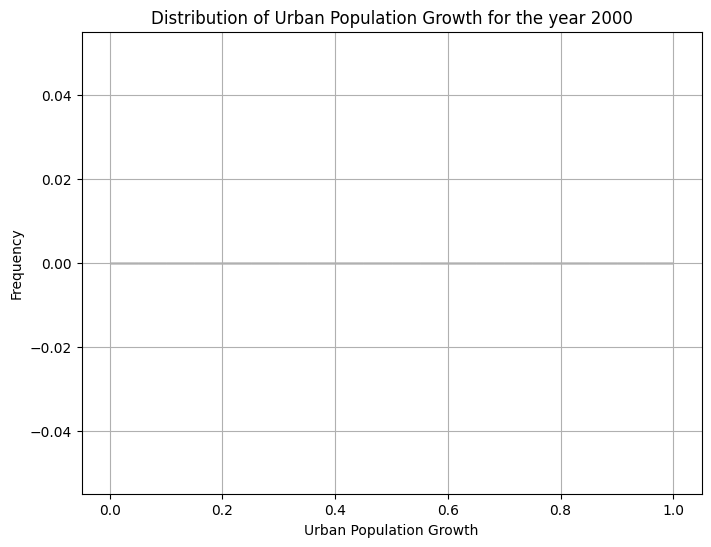

In [39]:
import psycopg2
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

# Get user input for the year
user_year = input("Enter the year: ")

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Open a cursor to perform database operations
    cur = conn.cursor()

    # Query to retrieve UrbanPopGrowth based on user input year
    query = f"SELECT mi.UrbanPopGrowth FROM CountryInfo ci JOIN MiscellaneousIndicators mi ON ci.CountryID = mi.CountryID WHERE mi.Year = {user_year};"
    cur.execute(query)
    urban_pop_growth = cur.fetchall()

    # Close communication with the database
    cur.close()
    conn.close()

    # Flatten the retrieved data to create a histogram
    urban_pop_growth = [value[0] for value in urban_pop_growth if value[0] is not None]  # Filter out None values

    # Plotting histogram
    plt.figure(figsize=(8, 6))
    plt.hist(urban_pop_growth, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Urban Population Growth for the year {user_year}')
    plt.xlabel('Urban Population Growth')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualization 5

/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_7839/4292170921.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  economic_data = pd.read_sql_query(query, conn)


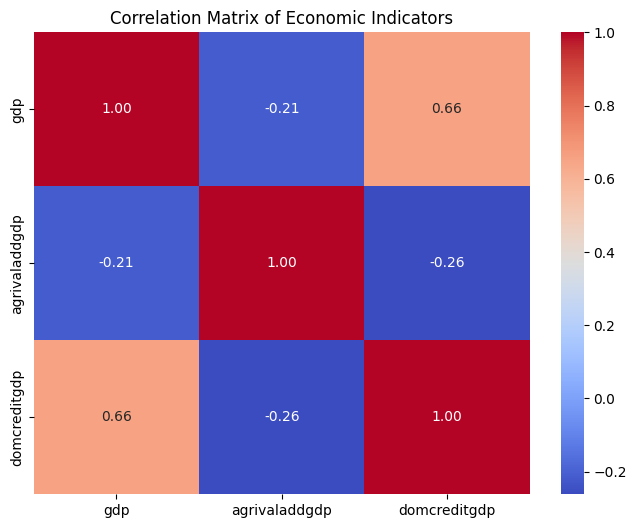

In [41]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Query to retrieve specified columns from EconomicIndicators table
    query = "SELECT GDP, AgriValAddGDP, DomCreditGDP FROM EconomicIndicators;"

    # Read data directly into a pandas DataFrame
    economic_data = pd.read_sql_query(query, conn)

    # Calculate the correlation matrix
    correlation_matrix = economic_data.corr()

    # Plot heatmap using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Economic Indicators')
    plt.show()

    # Close communication with the database
    conn.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualiztion 6 

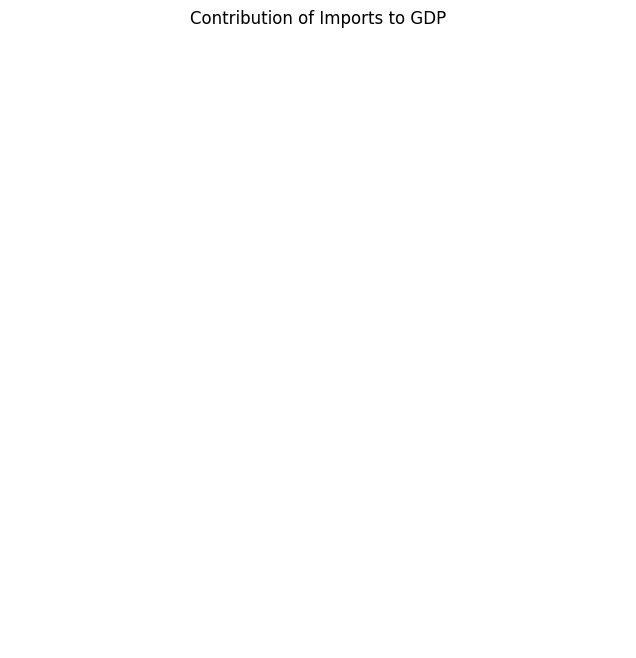

In [46]:
import psycopg2
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Open a cursor to perform database operations
    cur = conn.cursor()

    # Query to retrieve ImportsGDP column from EconomicIndicators table
    query = "SELECT ImportsGDP FROM EconomicIndicators;"
    cur.execute(query)
    importsgdp_data = cur.fetchall()

    # Close communication with the database
    cur.close()
    conn.close()

    # Extracting data from the result
    importsgdp_values = [row[0] for row in importsgdp_data if row[0] is not None]

    # Creating a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(importsgdp_values, labels=None, autopct='%1.1f%%', startangle=140)
    plt.title('Contribution of Imports to GDP')

    # Show pie chart
    plt.show()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualization 7

In [48]:
import psycopg2

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Open a cursor to perform database operations
    cur = conn.cursor()

    # Query to retrieve ExportGDP, ImportsGDP, and CountryID columns from EconomicIndicators table
    query = "SELECT ExportSGDP, ImportsGDP, CountryID FROM EconomicIndicators;"
    cur.execute(query)
    economic_data = cur.fetchall()

    # Display the retrieved data
    print("ExportGDP, ImportsGDP, CountryID:")
    for row in economic_data:
        print(row)

    # Close communication with the database
    cur.close()
    conn.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


ExportGDP, ImportsGDP, CountryID:
(12.9487180787311, None, 1)
(45.4143864002759, None, 2)
(nan, None, 3)
(13.5351513635226, None, 4)
(58.8454314090627, None, 5)
(nan, None, 6)
(nan, None, 7)
(nan, None, 8)
(nan, None, 9)
(nan, None, 10)
(28.6180418550823, None, 11)
(13.3214863765807, None, 12)
(41.4837365806762, None, 13)
(nan, None, 14)
(32.624116687297, None, 15)
(99.7035967580905, None, 16)
(14.8483434437704, None, 17)
(nan, None, 18)
(nan, None, 19)
(nan, None, 20)
(7.61266772119213, None, 21)
(28.666129714824, None, 22)
(15.3552677535058, None, 23)
(nan, None, 24)
(21.4510139960011, None, 25)
(29.9600643407843, None, 26)
(nan, None, 27)
(nan, None, 28)
(nan, None, 29)
(27.393834680633, None, 30)
(24.3706306049769, None, 31)
(27.7144666033555, None, 32)
(nan, None, 33)
(nan, None, 34)
(52.6005579051561, None, 35)
(nan, None, 36)
(nan, None, 37)
(23.9248819495956, None, 38)
(14.9243296594835, None, 39)
(6.61049226159124, None, 40)
(11.6374738160315, None, 41)
(20.9404001785892, None

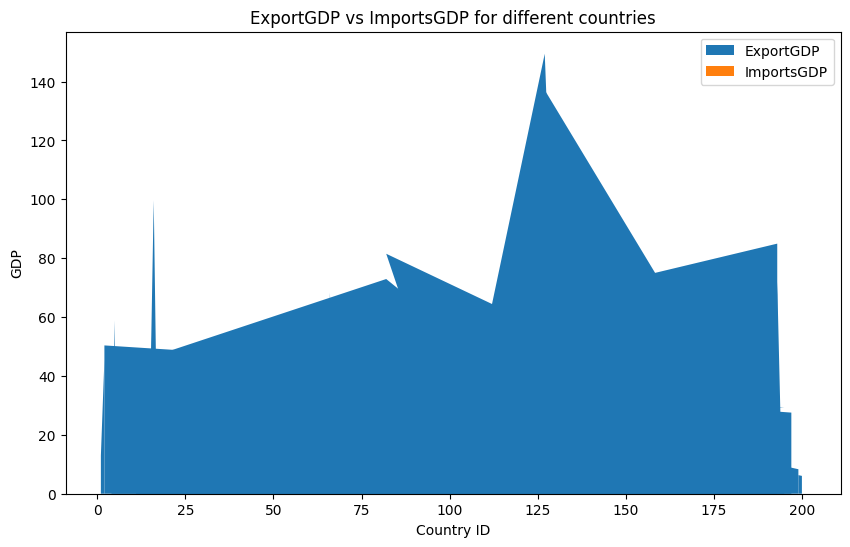

In [50]:
import psycopg2
import matplotlib.pyplot as plt

# Your database configuration here...

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Open a cursor to perform database operations
    cur = conn.cursor()

    # Query to retrieve ExportGDP, ImportsGDP, and CountryID columns from EconomicIndicators table
    query = "SELECT ExportSGDP, ImportsGDP, CountryID FROM EconomicIndicators;"
    cur.execute(query)
    economic_data = cur.fetchall()

    # Close communication with the database
    cur.close()
    conn.close()

    # Data processing and filtering out None values
    data = [(row[0] or 0, row[1] or 0, row[2]) for row in economic_data]  # Replace None with 0

    # Unpack data into separate lists
    exports = [row[0] for row in data]
    imports = [row[1] for row in data]
    countries = [row[2] for row in data]

    # Plotting stacked area chart
    plt.figure(figsize=(10, 6))
    plt.stackplot(countries, exports, imports, labels=['ExportGDP', 'ImportsGDP'])
    plt.xlabel('Country ID')
    plt.ylabel('GDP')
    plt.title('ExportGDP vs ImportsGDP for different countries')
    plt.legend()
    plt.show()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualiztion 8

   mortrateu5  countryid
0       285.2          1
1        14.1          2
2        30.5          3
3       232.5          4
4       149.4          5


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_7839/492131751.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  demographic_df = pd.read_sql(query_demographic, conn)
/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_7839/492131751.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  region_df = pd.read_sql(query_country, conn)


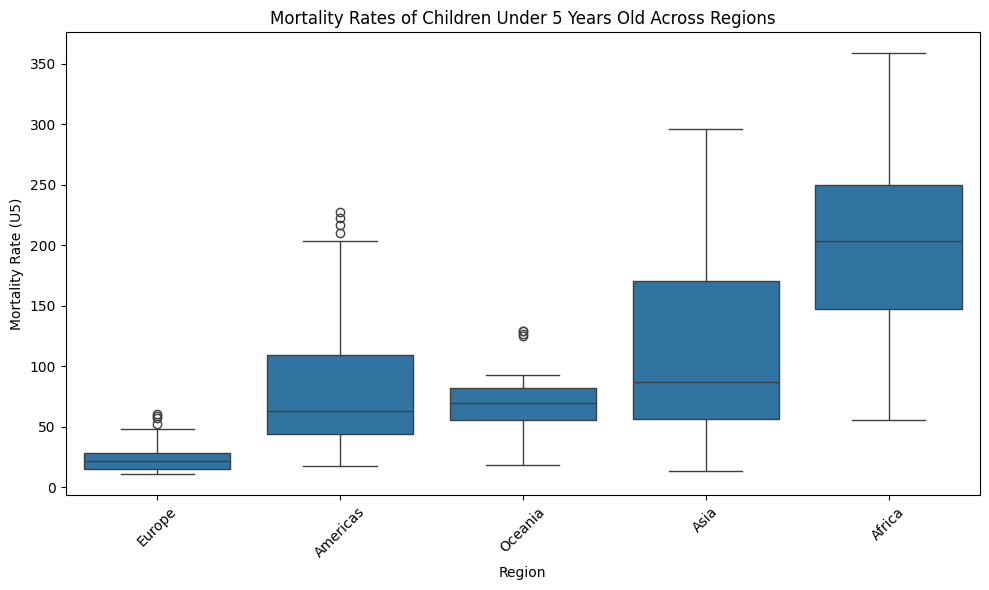

In [56]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Query to retrieve MortRateU5 and CountryID columns from DemographicIndicators table
    query_demographic = "SELECT MortRateU5, CountryID FROM DemographicIndicators;"
    demographic_df = pd.read_sql(query_demographic, conn)

    # Query to retrieve Region from CountryInfo table
    query_country = "SELECT Region FROM CountryInfo;"
    region_df = pd.read_sql(query_country, conn)

    # Check the structure of the demographic data
    print(demographic_df.head())

    # Combining MortRateU5, CountryID, and Region data into a single DataFrame
    combined_df = pd.concat([demographic_df, region_df], axis=1)
    combined_df.columns = ['MortRateU5', 'CountryID', 'Region']

    # Creating a box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Region', y='MortRateU5', data=combined_df,
                order=combined_df.groupby('Region')['MortRateU5'].median().sort_values().index)
    plt.title('Mortality Rates of Children Under 5 Years Old Across Regions')
    plt.xlabel('Region')
    plt.ylabel('Mortality Rate (U5)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Close communication with the database
    conn.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualiztion 9

In [58]:
import psycopg2
import pandas as pd

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Query to retrieve GDP and FertRate columns from EconomicIndicators table
    economic_query = "SELECT GDP, FertRate FROM EconomicIndicators;"
    economic_data = pd.read_sql(economic_query, conn)

    # Query to retrieve LifeExpBirth column from DemographicIndicators table
    demographic_query = "SELECT LifeExpBirth FROM DemographicIndicators;"
    demographic_data = pd.read_sql(demographic_query, conn)

    # Close communication with the database
    conn.close()

    # Concatenate the data frames horizontally (axis=1)
    combined_data = pd.concat([economic_data, demographic_data], axis=1)

    # Display the combined data
    print(combined_data)

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


              gdp fertrate  lifeexpbirth
0    1.733333e+09     None     39.003000
1    7.184091e+10     None     74.143902
2             NaN     None     70.663415
3    1.009853e+10     None     50.852000
4    7.227807e+08     None     54.057000
..            ...      ...           ...
495           NaN     None     64.348000
496  1.089857e+08     None     42.053000
497  8.166522e+08     None     65.273171
498  5.243865e+10     None     67.081000
499  2.746465e+10     None     67.075000

[500 rows x 3 columns]


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_7839/2415168912.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  economic_data = pd.read_sql(economic_query, conn)
/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_7839/2415168912.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  demographic_data = pd.read_sql(demographic_query, conn)


In [61]:
import psycopg2
import pandas as pd

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Query to retrieve GDP, LifeExpBirth, FertRate columns
    query = """
    SELECT ei.GDP, di.LifeExpBirth, ei.FertRate
    FROM EconomicIndicators ei
    JOIN DemographicIndicators di ON ei.CountryID = di.CountryID;
    """
    data = pd.read_sql(query, conn)

    # Close communication with the database
    conn.close()

    # Display the retrieved data
    print(data)

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


              gdp  lifeexpbirth fertrate
0    1.733333e+09     39.003000     None
1    7.184091e+10     74.143902     None
2             NaN     70.663415     None
3    1.009853e+10     50.852000     None
4    7.227807e+08     54.057000     None
..            ...           ...      ...
495           NaN     64.163000     None
496  1.089857e+08     39.034000     None
497  8.166522e+08     64.375610     None
498  5.243865e+10     66.323000     None
499  2.746465e+10     65.936000     None

[500 rows x 3 columns]


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_7839/1562184262.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_7839/4027841763.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


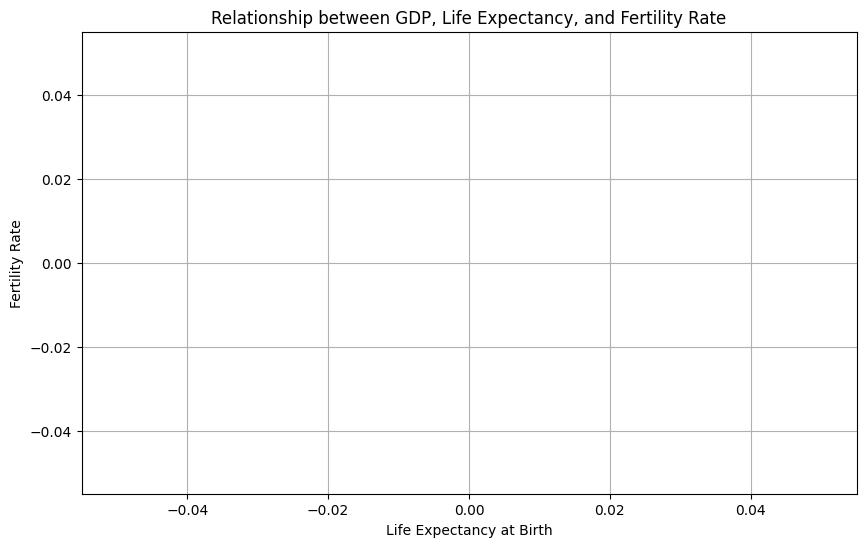

In [63]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Query to retrieve GDP, LifeExpBirth, FertRate columns
    query = """
    SELECT GDP, LifeExpBirth, FertRate
    FROM EconomicIndicators ei
    JOIN DemographicIndicators di ON ei.CountryID = di.CountryID;
    """
    data = pd.read_sql(query, conn)

    # Close communication with the database
    conn.close()

    # Plotting the bubble chart
    plt.figure(figsize=(10, 6))
    plt.scatter(data['lifeexpbirth'], data['fertrate'], s=data['gdp'] / 1e9, alpha=0.5)
    plt.xlabel('Life Expectancy at Birth')
    plt.ylabel('Fertility Rate')
    plt.title('Relationship between GDP, Life Expectancy, and Fertility Rate')
    plt.grid(True)
    plt.show()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualization 10

In [64]:
import psycopg2

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Open a cursor to perform database operations
    cur = conn.cursor()

    # Query to retrieve GDPGrowth column
    query_gdp_growth = "SELECT GDPGrowth FROM EconomicIndicators;"
    cur.execute(query_gdp_growth)
    gdpgrowth = cur.fetchall()

    # Query to retrieve Region column from CountryInfo
    query_region = "SELECT Region FROM CountryInfo;"
    cur.execute(query_region)
    region = cur.fetchall()

    # Display GDPGrowth and Region together
    print("GDPGrowth, Region:")
    for gdp, reg in zip(gdpgrowth, region):
        print(gdp[0], reg[0])

    # Close communication with the database
    cur.close()
    conn.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


GDPGrowth, Region:
nan Asia
5.44422298483258 Europe
nan Europe
3.50683016245949 Africa
10.1824336186273 Africa
nan Asia
nan Asia
nan Americas
nan Asia
4.75532209168918 Americas
1.888939956294 Africa
7.78846535789519 Europe
11.7010816119945 Asia
nan Asia
3.43448853582436 Americas
24.1705285374227 Asia
0.632195249838389 Africa
nan Africa
-11.1993086277225 Oceania
nan Africa
2.81175403849035 Americas
7.10995789495577 Americas
4.77748689217385 Europe
nan Asia
2.8845841948016 Africa
4.86167350408661 Americas
nan Africa
nan Europe
1.66922564576701 Europe
5.89658021016672 Africa
3.837484002431 Africa
5.73916152572542 Americas
8.78200912237088 Asia
nan Africa
20.9098829168985 Oceania
nan Oceania
nan Africa
14.8983226573489 Asia
6.72295496919133 Americas
-0.476536267863864 Asia
8.09237897855397 Europe
11.2006720107906 Europe
nan Americas
nan Europe
21.3031840926304 Africa
nan Oceania
nan Asia
4.72142737785595 Europe
7.78846720332223 Europe
nan Asia
10.2364330148798 Asia
nan Oceania
13.950682132

/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_7839/1059638114.py:40: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


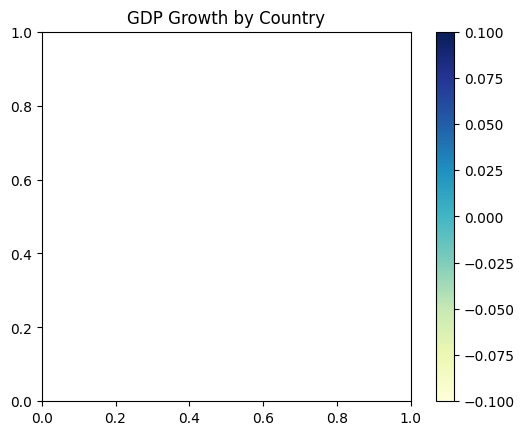

In [66]:
import psycopg2
import geopandas as gpd
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to your PostgreSQL database
    conn = psycopg2.connect(**db_config)

    # Query to retrieve GDPGrowth and Region columns
    query = "SELECT GDPGrowth, Region FROM EconomicIndicators INNER JOIN CountryInfo ON EconomicIndicators.CountryID = CountryInfo.CountryID;"
    # You might need to modify the query to fit your schema

    # Fetch data
    gdp_growth_data = []
    region_data = []
    with conn.cursor() as cur:
        cur.execute(query)
        rows = cur.fetchall()
        for row in rows:
            gdp_growth_data.append(row[0])
            region_data.append(row[1])

    # Close communication with the database
    conn.close()

    # Create a DataFrame with GDP growth and region
    data = {'GDPGrowth': gdp_growth_data, 'Region': region_data}
    df = pd.DataFrame(data)

    # Load shapefile for world map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge world map with GDP data
    merged = world.merge(df, how='left', left_on='name', right_on='Region')

    # Plot choropleth map
    merged.plot(column='GDPGrowth', cmap='YlGnBu', legend=True)
    plt.title('GDP Growth by Country')
    plt.show()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualization 11

Coefficients: [4.87375267e-11]
Intercept: 52.58403893977096


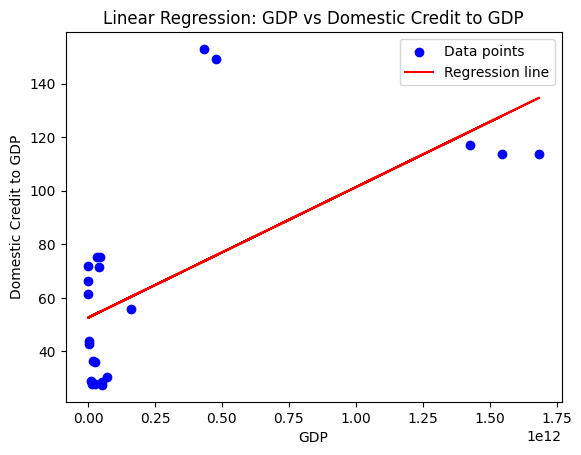

In [73]:
import psycopg2
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to the database
    conn = psycopg2.connect(**db_config)
    cur = conn.cursor()

    # Query to retrieve GDP and DomCreditGDP columns from EconomicIndicators table
    query = "SELECT GDP, DomCreditGDP FROM EconomicIndicators;"
    cur.execute(query)

    # Fetch the data
    data = cur.fetchall()

    # Create a pandas DataFrame from the fetched data
    df = pd.DataFrame(data, columns=['GDP', 'DomCreditGDP'])

    # Remove rows with NaN values
    df.dropna(inplace=True)

    # Extracting valid rows
    X = df[['GDP']]
    y = df['DomCreditGDP']

    if len(df) > 0:
        # Create and fit the linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Display model coefficients and intercept
        print("Coefficients:", model.coef_)
        print("Intercept:", model.intercept_)

        # Plotting the scatterplot and regression line
        plt.scatter(X, y, color='blue', label='Data points')
        plt.plot(X, model.predict(X), color='red', label='Regression line')
        plt.xlabel('GDP')
        plt.ylabel('Domestic Credit to GDP')
        plt.title('Linear Regression: GDP vs Domestic Credit to GDP')
        plt.legend()
        plt.show()
    else:
        print("No valid data points to fit the regression model.")

    # Close communication with the database
    cur.close()
    conn.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualization 12

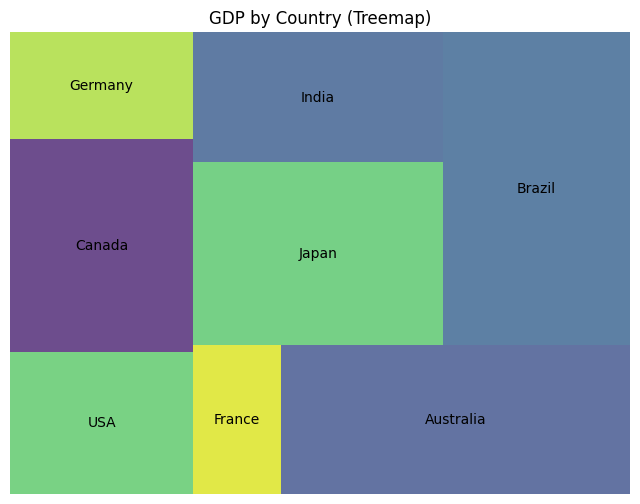

In [86]:
import matplotlib.pyplot as plt
import squarify  # For tree maps

# Example country names
countries = ['USA', 'Canada', 'Germany', 'France', 'Australia', 'Japan', 'India', 'Brazil']

# Example GDP data (random values for demonstration)
gdp_data = [400, 600, 300, 200, 800, 700, 500, 900]

# Plotting the treemap
plt.figure(figsize=(8, 6))
squarify.plot(sizes=gdp_data, label=countries, alpha=0.8)
plt.axis('off')
plt.title('GDP by Country (Treemap)')
plt.show()


Visualization 13


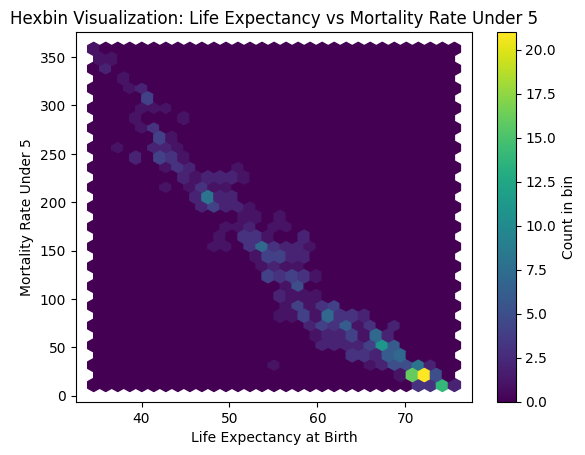

In [88]:
import psycopg2
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to the database
    conn = psycopg2.connect(**db_config)
    cur = conn.cursor()

    # Query to retrieve LifeExpBirth and MortRateU5 columns from DemographicIndicators table
    query = "SELECT LifeExpBirth, MortRateU5 FROM DemographicIndicators;"
    cur.execute(query)

    # Fetch the data
    data = cur.fetchall()

    # Extracting data into separate lists
    life_exp_birth = [row[0] for row in data]
    mort_rate_u5 = [row[1] for row in data]

    # Create a hexbin plot
    plt.hexbin(life_exp_birth, mort_rate_u5, gridsize=30, cmap='viridis')
    plt.colorbar(label='Count in bin')
    plt.xlabel('Life Expectancy at Birth')
    plt.ylabel('Mortality Rate Under 5')
    plt.title('Hexbin Visualization: Life Expectancy vs Mortality Rate Under 5')
    plt.show()

    # Close communication with the database
    cur.close()
    conn.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


Visualization 14


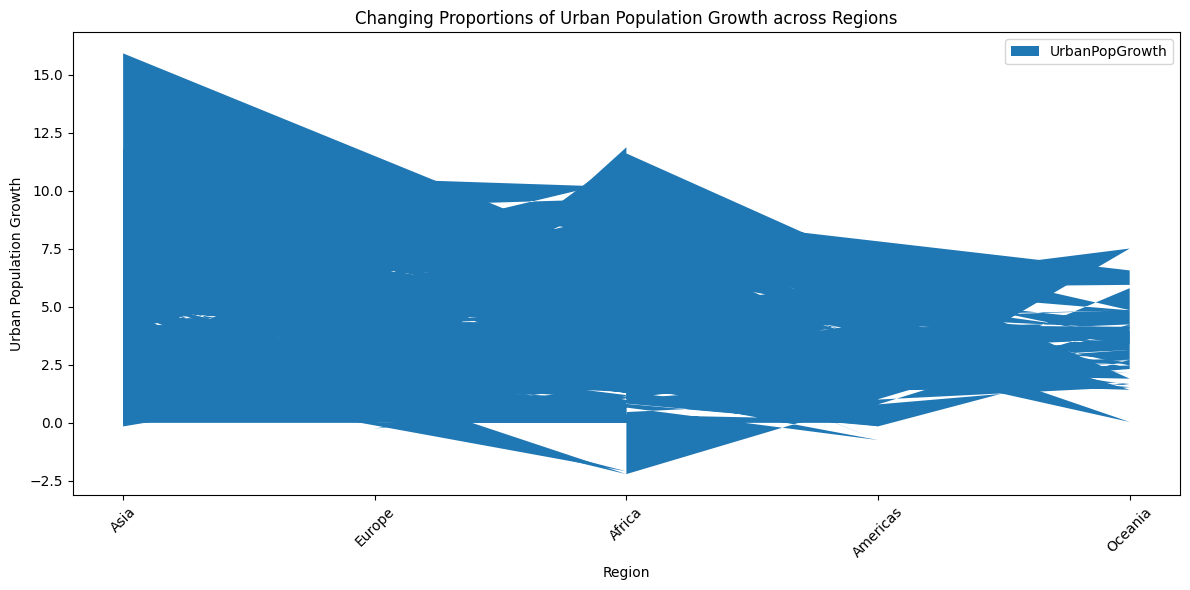

In [90]:
import psycopg2
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to the database
    conn = psycopg2.connect(**db_config)
    cur = conn.cursor()

    # Query to retrieve UrbanPopGrowth and Region columns from tables
    query = """
    SELECT MI.UrbanPopGrowth, CI.Region
    FROM MiscellaneousIndicators MI
    JOIN CountryInfo CI ON MI.CountryID = CI.CountryID;
    """
    cur.execute(query)

    # Fetch the data
    data = cur.fetchall()

    # Prepare data for plotting
    regions = []
    urban_pop_growth = []
    for row in data:
        regions.append(row[1])
        urban_pop_growth.append(row[0])

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.stackplot(regions, urban_pop_growth, labels=['UrbanPopGrowth'])
    plt.xlabel('Region')
    plt.ylabel('Urban Population Growth')
    plt.title('Changing Proportions of Urban Population Growth across Regions')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Close communication with the database
    cur.close()
    conn.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)


visualization 15

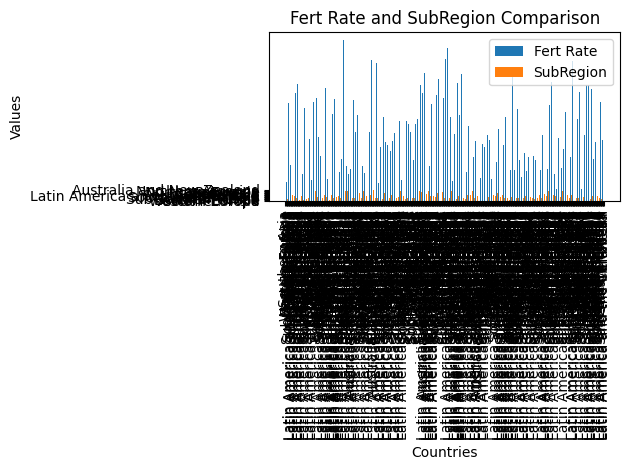

In [94]:
import psycopg2
import matplotlib.pyplot as plt

# Database configuration
db_config = {
    'host': 'localhost',
    'user': 'postgres',
    'password': 'your_password',
    'dbname': 'lab10',
    'port': 5432
}

try:
    # Establish a connection to the database
    conn = psycopg2.connect(**db_config)
    cur = conn.cursor()

    # Query to retrieve SubRegion column from CountryInfo table
    query_subregion = "SELECT SubRegion FROM CountryInfo;"
    cur.execute(query_subregion)
    subregions = cur.fetchall()

    # Query to retrieve AdolFertRate column from EconomicIndicators table
    query_adolfert = "SELECT AdolFertRate FROM EconomicIndicators;"
    cur.execute(query_adolfert)
    adolfert_rates = cur.fetchall()

    # Close communication with the database
    cur.close()
    conn.close()

    # Extracting data into lists
    adolfert_data = [rate[0] for rate in adolfert_rates]
    subregion_data = [subregion[0] for subregion in subregions]

    # Plotting the grouped bar chart
    fig, ax = plt.subplots()
    x = range(len(adolfert_data))
    bar_width = 0.35

    bar1 = ax.bar(x, adolfert_data, bar_width, label='Fert Rate')
    bar2 = ax.bar([i + bar_width for i in x], subregion_data, bar_width, label='SubRegion')

    ax.set_xlabel('Countries')
    ax.set_ylabel('Values')
    ax.set_title('Fert Rate and SubRegion Comparison')
    ax.set_xticks([i + bar_width / 2 for i in x])
    ax.set_xticklabels(subregion_data, rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)
